# WhisperX: Time-Accurate Speech Transcription of Long-Form Audio

This notebook contains two major sections summarizing two peer-reviewed scientific articles in machine learning:

1. **Practical Focus**: *WhisperX: Time-Accurate Speech Transcription of Long-Form Audio* – a paper describing novel techniques to improve long-form speech transcription with word-level alignment. ([Original Paper](https://github.com/m-bain/whisperX))
2. **Theoretical Focus**: *Learning Student-Friendly Teacher Networks for Knowledge Distillation* – a paper presenting theoretical insights into improving the teacher–student paradigm in knowledge distillation. ([Original Paper](https://arxiv.org/abs/2102.07650))

The notebook also includes experiment sections with code examples and implementations inspired by each paper.

## Practical Paper Summary: WhisperX
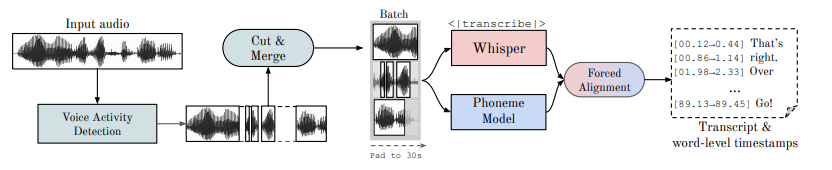
### Overview

The paper **WhisperX: Time-Accurate Speech Transcription of Long-Form Audio** addresses a common challenge in automatic speech recognition: how to accurately transcribe long-form audio (such as meetings, podcasts, or videos) while providing precise word-level timestamps.

### Problem & Approach

Traditional ASR systems like Whisper are trained on short audio segments (around 30 seconds) and suffer from two main issues when applied to longer audio:

- **Inaccurate timestamps:** The sequential (buffered) transcription may lead to cumulative errors in the predicted timestamps.
- **Limited scalability:** Transcribing long audios sequentially prevents parallel processing.

To overcome these issues, WhisperX introduces three key components:

1. **Voice Activity Detection (VAD):** The input audio is first pre-segmented using a VAD model. The audio waveform is represented as a sequence of feature vectors, $A = \{a_1, a_2, \dots, a_T\}$, and the VAD model produces binary labels $y = \{y_1, y_2, \dots, y_T\}$ where:
   $$
   y_t = \begin{cases}
   1 & \text{if speech is present at time } t, \\
   0 & \text{otherwise.}
   \end{cases}
   $$

2. **Cut & Merge (Segment Adjustment):** The VAD output segments are then adjusted using a "min-cut" strategy. Long segments (longer than the maximum duration, say 30 seconds) are cut at the point with the minimum VAD score to ensure the segments are not too long. A merge step is then applied to combine very short segments, thereby preserving context. This is crucial because misaligned boundaries can lead to errors in transcription.

3. **Forced Phoneme Alignment:** Finally, each segmented audio chunk is processed with the Whisper model to produce a transcription. An additional phoneme recognition model is used to perform forced alignment on the resulting text. Given a logits matrix $L \in \mathbb{R}^{K \times T}$ (with $K$ phoneme classes and $T$ time steps), Dynamic Time Warping (DTW) is applied to determine the optimal alignment path, thereby providing accurate word-level timestamps.

### Key Formulas & Concepts

1. **VAD Labeling:**

   $$
   y_t = \begin{cases}
   1 & \text{if } a_t > \text{threshold}, \\
   0 & \text{otherwise}
   \end{cases}
   $$

2. **Min-Cut Operation:**

   To limit a segment $s$ to a maximum length $L_{max}$, a cut is performed at the index $t^*$ given by:

   $$
   t^* = \operatorname*{argmin}_{t \in [p, q]} score(t)
   $$

   where $[p,q]$ is the interval of potential cut points.

3. **Forced Alignment via DTW:**

   The alignment is determined by minimizing the cumulative distance between the predicted phoneme sequence $P$ and the transcript phoneme sequence $T$:

   $$
   DTW(P, T) = \min_{\pi \in \mathcal{A}} \sum_{(i,j) \in \pi} d(P_i, T_j)
   $$

### Implications & Experiments

The benefits of this approach are twofold: it improves the accuracy of word-level timestamps and enables parallelized, batched transcription – yielding significant speedups (up to 12× faster transcription in some experiments).

The code cell below (in the experiments section) simulates a simple VAD segmentation process inspired by the methods in WhisperX.

[For more details, refer to the [WhisperX GitHub repository](https://github.com/m-bain/whisperX)].

> **Note:** This summary covers the fundamental ideas, key formulas, and the practical impact of the WhisperX method on real-world ASR tasks.

## Theoretical Paper Summary: Learning Student-Friendly Teacher Networks for Knowledge Distillation

### Overview

Knowledge distillation is a process by which a compact **student** model is trained to replicate the behavior of a larger, more complex **teacher** model. In the paper *Learning Student-Friendly Teacher Networks for Knowledge Distillation* (Park et al., 2021), the authors propose modifications to the teacher network to generate outputs that are easier for the student to mimic.

### Problem & Approach

Traditional knowledge distillation works by training a student model to match the softened outputs (probability distributions) of a teacher model. However, this process can be challenging if the teacher’s outputs are too difficult for the student to replicate. This paper proposes a "student-friendly" approach where the teacher is adapted or optimized so that its outputs are smoother and more aligned with the student's capacity.

The key innovations include:

1. **Temperature Scaling:** Softening the teacher's logits using a temperature parameter $T$ helps to reveal the dark knowledge (i.e., the relative probabilities among classes). The softmax function with temperature is given by:

   $$
   q_i = \frac{\exp\left(\frac{z_i}{T}\right)}{\sum_j \exp\left(\frac{z_j}{T}\right)}
   $$

2. **Distillation Loss:** The overall training loss for the student model combines the standard cross-entropy loss $\mathcal{L}_{\text{CE}}$ with the distillation loss $\mathcal{L}_{\text{KD}}$. A common formulation is:

   $$
   \mathcal{L} = \alpha \; \mathcal{L}_{\text{CE}} + (1 - \alpha) \; \tau^2 \; \text{KL}(p_T, p_S),
   $$

   where $p_T$ and $p_S$ are the softened probability distributions of the teacher and student respectively, $\alpha$ balances the two loss terms, and $\tau$ is the temperature.

3. **Teacher Adaptation:** Beyond simply using a fixed teacher network, the paper discusses strategies to modify the teacher network during training so that the outputs are more "student-friendly." This might involve a secondary loss or an architectural tweak to reduce overconfidence in predictions.

### Key Formulas & Concepts

1. **Softmax with Temperature:**

   $$
   q_i = \frac{\exp\left(\frac{z_i}{T}\right)}{\sum_j \exp\left(\frac{z_j}{T}\right)}
   $$

   This formula shows how increasing $T$ results in a softer probability distribution.

2. **Distillation Loss:**

   $$
   \mathcal{L}_{\text{KD}} = \tau^2 \; \text{KL}(p_T, p_S) = \tau^2 \sum_i p_T(i) \log \frac{p_T(i)}{p_S(i)}
   $$

   Here, the Kullback-Leibler (KL) divergence measures how the student’s distribution $p_S$ deviates from the teacher’s $p_T$.

3. **Combined Loss Function:**

   $$
   \mathcal{L} = \alpha \; \mathcal{L}_{\text{CE}} + (1 - \alpha) \; \tau^2 \; \text{KL}(p_T, p_S)
   $$

### Implications & Experiments

By tailoring the teacher’s outputs to be easier for the student to emulate, the proposed method enables the student model to achieve higher accuracy while being significantly smaller and more efficient.

In the experiments below, you will find an implementation of a simple teacher–student model using PyTorch. The code demonstrates the basic ideas of temperature scaling, loss computation, and a training loop that mimics the knowledge distillation process.

_For more details, refer to the original paper on [arXiv](https://arxiv.org/abs/2102.07650)._

> **Note:** This summary emphasizes the theoretical underpinnings of distillation, including the mathematical foundations and implications for model compression and efficiency.

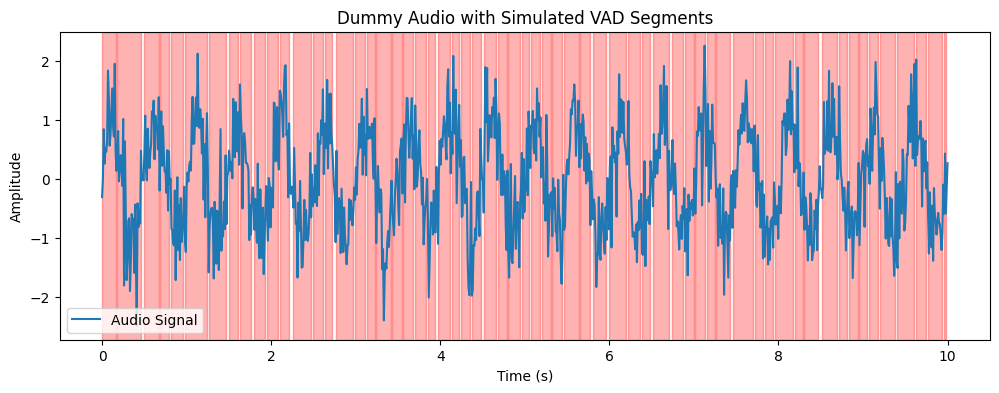

In [ ]:
# Simulated Voice Activity Detection (VAD) Segmentation
# This code cell simulates the VAD process described in WhisperX.
# We generate a dummy audio signal and simulate VAD scores, then perform a cut & merge

import numpy as np
import matplotlib.pyplot as plt

def generate_dummy_audio(duration=30, fs=100):
    """
    Generates a dummy audio signal (sine waves with noise) of given duration (in seconds).
    fs: sampling frequency (samples per second)
    """
    t = np.linspace(0, duration, duration * fs)
    # Sine wave with frequency 2 Hz and added noise
    audio = np.sin(2 * np.pi * 2 * t) + 0.5 * np.random.randn(len(t))
    return t, audio

def simulate_vad_scores(audio, threshold=0.3):
    """
    Simulate VAD scores based on absolute amplitude (dummy simulation).
    Returns binary VAD labels.
    """
    scores = np.abs(audio)
    vad_labels = (scores > threshold).astype(int)
    return scores, vad_labels

def cut_and_merge(vad_labels, max_len=50, merge_thresh=10):
    """
    Simulate the cut & merge process on VAD labels.
    max_len: maximum allowed segment length
    merge_thresh: merge segments shorter than this threshold
    Returns a list of (start, end) indices for segments.
    """
    segments = []
    start = None
    for i, label in enumerate(vad_labels):
        if label == 1 and start is None:
            start = i
        elif label == 0 and start is not None:
            segments.append((start, i))
            start = None
    if start is not None:
        segments.append((start, len(vad_labels)))

    # Cut segments that are too long
    new_segments = []
    for (s, e) in segments:
        if (e - s) > max_len:
            # cut at the midpoint for simplicity
            mid = s + (e - s) // 2
            new_segments.append((s, mid))
            new_segments.append((mid, e))
        else:
            new_segments.append((s, e))

    # Merge segments that are too short
    merged_segments = []
    i = 0
    while i < len(new_segments):
        s, e = new_segments[i]
        while (e - s) < merge_thresh and i < len(new_segments)-1:
            _, next_e = new_segments[i+1]
            e = next_e
            i += 1
        merged_segments.append((s, e))
        i += 1
    return merged_segments

# Generate dummy audio
t, audio = generate_dummy_audio(duration=10, fs=100)
scores, vad_labels = simulate_vad_scores(audio, threshold=0.3)
segments = cut_and_merge(vad_labels, max_len=50, merge_thresh=10)

# Plot the audio signal and VAD decisions
plt.figure(figsize=(12, 4))
plt.plot(t, audio, label='Audio Signal')
for (s, e) in segments:
    plt.axvspan(t[s], t[e-1], color='red', alpha=0.3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Dummy Audio with Simulated VAD Segments')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# Set random seed for reproducibility
torch.manual_seed(42)

############################################
# Define teacher and student networks      #
############################################

class TeacherNet(nn.Module):
    def __init__(self, input_dim=120, hidden_dim=50, num_classes=30):
        super(TeacherNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

class StudentNet(nn.Module):
    def __init__(self, input_dim=10, hidden_dim=20, num_classes=5):
        super(StudentNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        return out

############################################
# Define the knowledge distillation loss   #
############################################

def safe_distillation_loss(student_logits, teacher_logits, targets, T=2.0, alpha=0.7, eps=1e-8):
    # Detach teacher logits to avoid backpropagating into teacher
    teacher_logits = teacher_logits.detach()
    # Compute soft targets with temperature scaling, ensuring probabilities are clamped
    teacher_probs = F.softmax(teacher_logits / T, dim=1).clamp(min=eps, max=1.0)
    student_log_probs = F.log_softmax(student_logits / T, dim=1)
    kd_loss = F.kl_div(student_log_probs, teacher_probs, reduction='batchmean') * (T * T)
    ce_loss = F.cross_entropy(student_logits, targets)
    return alpha * ce_loss + (1 - alpha) * kd_loss


############################################
# Synthetic Data Generation                #
############################################

def generate_synthetic_data(num_samples=500, input_dim=10, num_classes=5):
    X = torch.randn(num_samples, input_dim)
    y = torch.randint(0, num_classes, (num_samples,))
    return X, y

############################################
# Pre-train the Teacher (Simulated)          #
############################################

input_dim = 120
num_classes = 30
batch_size = 64

# Instantiate teacher and student networks
teacher = TeacherNet(input_dim=input_dim, hidden_dim=50, num_classes=num_classes)
student = StudentNet(input_dim=input_dim, hidden_dim=20, num_classes=num_classes)
torch.nn.utils.clip_grad_norm_(student.parameters(), max_norm=1.0)

# Generate synthetic training data
X_train, y_train = generate_synthetic_data(num_samples=500, input_dim=input_dim, num_classes=num_classes)
num_batches = X_train.size(0) // batch_size

# Pre-train the teacher for a few epochs to simulate a strong teacher
optimizer_teacher = optim.Adam(teacher.parameters(), lr=0.001)
teacher.train()
print("Pre-training teacher...")
pre_train_epochs = 150 # Pre-train teacher for 150 epochs
for epoch in range(pre_train_epochs):
    for i in range(num_batches):
        optimizer_teacher.zero_grad()
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        inputs = X_train[start_idx:end_idx]
        targets = y_train[start_idx:end_idx]
        outputs = teacher(inputs)
        loss = F.cross_entropy(outputs, targets)
        loss.backward()
        optimizer_teacher.step()
    print(f"Teacher pre-train epoch {epoch+1}/{pre_train_epochs} complete.")

# Freeze teacher parameters for distillation
teacher.eval()

############################################
# Train the Student via Knowledge Distillation
############################################

optimizer_student = optim.Adam(student.parameters(), lr=0.0001)
student.train()

print("\nTraining student with knowledge distillation...")
num_epochs = 15000
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i in range(num_batches):
        optimizer_student.zero_grad()
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        inputs = X_train[start_idx:end_idx]
        targets = y_train[start_idx:end_idx]
        with torch.no_grad():
            teacher_logits = teacher(inputs)
        student_logits = student(inputs)
        loss = safe_distillation_loss(student_logits, teacher_logits, targets, T=2.0, alpha=0.7)
        loss.backward()
        optimizer_student.step()
        epoch_loss += loss.item()  # Accumulate loss for reporting
    avg_loss = epoch_loss / num_batches
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

############################################
# Evaluate the Student                     #
############################################

student.eval()
with torch.no_grad():
    outputs = student(X_train)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train).sum().item() / y_train.size(0) * 100
    print(f"\nStudent accuracy on synthetic data: {accuracy:.2f}%")

Streaming output truncated to the last 5000 lines.
Epoch 10003/15000, Loss: 0.1103
Epoch 10004/15000, Loss: 0.1103
Epoch 10005/15000, Loss: 0.1103
Epoch 10006/15000, Loss: 0.1103
Epoch 10007/15000, Loss: 0.1103
Epoch 10008/15000, Loss: 0.1103
Epoch 10009/15000, Loss: 0.1102
Epoch 10010/15000, Loss: 0.1102
Epoch 10011/15000, Loss: 0.1102
Epoch 10012/15000, Loss: 0.1102
Epoch 10013/15000, Loss: 0.1102
Epoch 10014/15000, Loss: 0.1102
Epoch 10015/15000, Loss: 0.1102
Epoch 10016/15000, Loss: 0.1102
Epoch 10017/15000, Loss: 0.1102
Epoch 10018/15000, Loss: 0.1102
Epoch 10019/15000, Loss: 0.1102
Epoch 10020/15000, Loss: 0.1102
Epoch 10021/15000, Loss: 0.1102
Epoch 10022/15000, Loss: 0.1101
Epoch 10023/15000, Loss: 0.1101
Epoch 10024/15000, Loss: 0.1101
Epoch 10025/15000, Loss: 0.1101
Epoch 10026/15000, Loss: 0.1101
Epoch 10027/15000, Loss: 0.1101
Epoch 10028/15000, Loss: 0.1101
Epoch 10029/15000, Loss: 0.1101
Epoch 10030/15000, Loss: 0.1101
Epoch 10031/15000, Loss: 0.1101
Epoch 10032/15000, Lo

In [ ]:
%%capture
!pip install whisperx

In [ ]:
import whisperx
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

audio_file = "/content/audio.mp3"

batch_size = 16

# 1. Loading the WhisperX model. Here we use the "large-v2" model.
# The compute_type can be "float16" for GPU acceleration.
model = whisperx.load_model("large-v2", device, compute_type="float32")

# 2. Load the audio file. WhisperX takes care of preprocessing (resampling, etc.)
audio = whisperx.load_audio(audio_file)

# 3. Perform batched transcription. This returns a dictionary with key "segments" among others.
result = model.transcribe(audio, batch_size=batch_size)

# 4. Print the raw transcription segments (with preliminary timestamps)
print("=== Transcription before alignment ===")
for segment in result["segments"]:
    start = segment['start']
    end = segment['end']
    text = segment['text']
    print(f"[{start:.2f} - {end:.2f}]: {text}")

# 5. For improved word-level timestamps, load the alignment model.
align_model, metadata = whisperx.load_align_model(language_code=result["language"], device=device)

# 6. Apply forced alignment using the alignment model.
result_aligned = whisperx.align(result["segments"], align_model, metadata, audio, device, return_char_alignments=False)

# 7. Print the aligned transcription segments.
output_filename = "/content/transcription_aligned.txt"
with open(output_filename, "w", encoding="utf-8") as f:
    for segment in result_aligned["segments"]:
        start = segment['start']
        end = segment['end']
        text = segment['text']
        f.write(f"[{start:.2f} - {end:.2f}]: {text}\n")

print(f"Aligned transcription saved to {output_filename}")

# 8. Optionally, if you want speaker diarization (requires a Hugging Face token):
# diarize_model = whisperx.DiarizationPipeline(use_auth_token="YOUR_HF_TOKEN", device=device)
# diarize_segments = diarize_model(audio)
# result_with_diarization = whisperx.assign_word_speakers(diarize_segments, result_aligned)
# print("\n=== Transcription with speaker diarization ===")
# for segment in result_with_diarization["segments"]:
#     speaker = segment.get('speaker', 'N/A')
#     print(f"[{segment['start']:.2f} - {segment['end']:.2f}] Speaker {speaker}: {segment['text']}")


No language specified, language will be first be detected for each audio file (increases inference time).


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../usr/local/lib/python3.11/dist-packages/whisperx/assets/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.5.1+cu124. Bad things might happen unless you revert torch to 1.x.
Detected language: en (1.00) in first 30s of audio...
=== Transcription before alignment ===
[0.03 - 24.36]:  Cascading stylesheets, or CSS, is a stylesheet language famous for making websites look pretty. By default, a browser will render HTML as a boring black and white document. CSS allows you to describe the presentation of this markup by modifying the size, color, positioning, and layout of HTML elements. It was first released in 1996 and evolved into CSS3 by 1999.
[24.36 - 42.57]:  The language continues to evolve to this day with new features, but there will never be a CSS4, just updates to the existing language. The typical CSS rule starts with a selector that can be matched to an element in the HTML document. You then use braces to cr

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth
100%|██████████| 360M/360M [00:07<00:00, 50.3MB/s]


Aligned transcription saved to /content/transcription_aligned.txt


## Conclusion and Future Directions

- In this notebook, we implemented an end-to-end transcription workflow inspired by the WhisperX system. The key innovations of WhisperX—namely, the use of Voice Activity Detection (VAD) coupled with a novel Cut & Merge preprocessing step—enable within-audio batched transcription. This approach drastically reduces both hallucination and repetition, achieving up to a twelve-fold increase in transcription speed without compromising quality.

- Furthermore, by incorporating forced phoneme alignment, the system refines the initial transcription output into highly accurate word-level segmentations. This results in precise, time-aligned transcriptions that are particularly beneficial for applications such as subtitling and speaker diarization.

- A promising direction for future work is the development of a single-stage ASR system that can efficiently transcribe long-form audio while directly producing accurate word-level timestamps. Such a system would further streamline the transcription process by eliminating the need for separate segmentation and alignment stages.